In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing the file

df=pd.read_csv("Salary_Survey.csv")

In [3]:
#Checking the shape of the file; how many observations and features to have an idea of the size of it.

df.shape

(28178, 23)

In [4]:
#Checking 5 first observations for overview
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#The features titles are long so I will double-check the names looking for hidden characters on them to rename them bellow.
    
print(df.columns)

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [6]:
#Marking corrupt values as missing to easier cleaning ahead.

missing_values=["n.a.","?","NA","n/a", "na", "--",'nan']
df = pd.read_csv("Salary_Survey.csv",na_values = missing_values)

In [7]:
#Rename the features to make the data easier to read and work with.

df=df.rename(columns={"How old are you?":"Age",'Job title':"Job_title","What industry do you work in?":"Industry",'If your job title needs additional context, please clarify here:':"Job_title_context","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Annual_Salary",'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.':"Monetary_Compensation","Please indicate the currency":"Currency",'If "Other," please indicate the currency here: ':"Other_currencies",'If your income needs additional context, please provide it here:':"Income_context", 'What country do you work in?':"Country_of_work","If you're in the U.S., what state do you work in?":"US_State",'What city do you work in?':"City_of_work","How many years of professional work experience do you have overall?":"Overral_experience",'How many years of professional work experience do you have in your field?':"Field_Expe_Years",'What is your highest level of education completed?':"Education",'What is your gender?':"Gender"})

In [8]:
#Checking info to see non-null values(values with some information), data type, and how much information we have in each feature.

df.info()

##--> Some features that should be numerical came up as object, which could be because of malformed values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28178 entries, 0 to 28177
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Job_title_context      7266 non-null   object 
 5   Annual_Salary          28085 non-null  object 
 6   Monetary_Compensation  20780 non-null  float64
 7   Currency               28085 non-null  object 
 8   Other_currencies       206 non-null    object 
 9   Income_context         3043 non-null   object 
 10  Country_of_work        28084 non-null  object 
 11  US_State               23059 non-null  object 
 12  City_of_work           27994 non-null  object 
 13  Overral_experience     28085 non-null  object 
 14  Field_Expe_Years       28085 non-null  object 
 15  Ed

<Axes: >

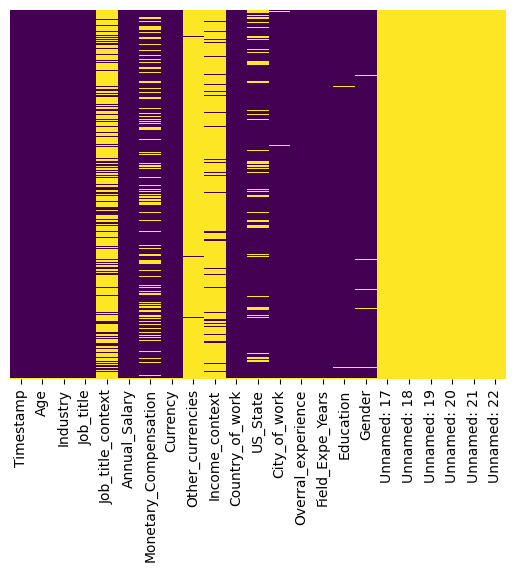

In [9]:
#HeatMap for better visualization of null values

sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#Job title context, other currencies and income context have very little values, most are null, and unnamed 17 to 22 are empty so I will drop those features.

In [10]:
#Checking all the empty values.

df.isnull().sum()

Timestamp                   93
Age                         93
Industry                   167
Job_title                   95
Job_title_context        20912
Annual_Salary               93
Monetary_Compensation     7398
Currency                    93
Other_currencies         27972
Income_context           25135
Country_of_work             94
US_State                  5119
City_of_work               184
Overral_experience          93
Field_Expe_Years            93
Education                  315
Gender                     264
Unnamed: 17              28178
Unnamed: 18              28178
Unnamed: 19              28178
Unnamed: 20              28178
Unnamed: 21              28178
Unnamed: 22              28178
dtype: int64

In [11]:
#Drop empty features.

df= df.dropna(axis = 1, how ='all')

In [12]:
#Drop the observations with all NaN values.

df = df.dropna(axis = 0, how ='all')

In [13]:
#Check for duplicates

df.duplicated().sum()

0

In [14]:
#Checking statistical information in the data set.

df.describe()

,Monetary_Compensation
count,2.078000e+04
mean,1.815342e+04
std,8.337722e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+03
75%,1.000000e+04
max,1.200000e+08


In [15]:
# Income_context has only 3043 non-null values, which means almost 90% of the data is missing for this feature so it became redundant. 
#Job_title_context is also redundant with only a bit more than 25% of data.
# Other_currencies has only 206 values and it can be dropped
#US State and City will not be used since I am planning on using currency as the demographic.

new_df = df.drop(columns=['Income_context','Job_title_context','Other_currencies','US_State','City_of_work'])

In [16]:
#Remove spaces from observations of features that normally would not have spaces.

df['Annual_Salary'] = df['Annual_Salary'].replace(' ', '')
df['Gender'] = df['Gender'].replace(' ', '')
df['Currency'] = df['Currency'].replace(' ', '')

In [17]:
#Drop commas and spaces from Salary to change it to numerical.

df['Annual_Salary']= df['Annual_Salary'].replace(',','', regex=True,)

#Stack Overflow. (n.d.). python - How to remove commas from ALL the column in pandas at once. 
#[online] Available at: https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once.

In [18]:
#Changing Annual_Salary feature to numerical.

df['Annual_Salary'] = df['Annual_Salary'].astype(float)

#writer, stats (2023). How Do I Convert An Object To A Float In Pandas? 
#[online] PSYCHOLOGICAL SCALES. Available at: https://scales.arabpsychology.com/stats/how-do-i-convert-an-object-to-a-float-in-pandas/#google_vignette [Accessed 7 Nov. 2024].

In [19]:
#Checking for malformed values on the observations so we can identify inconsistencies and standardize.

df['Annual_Salary'].unique()

array([55000., 54600., 34000., ...,  7000., 37741., 53060.])

In [20]:
df['Age'].unique()

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

In [21]:
#Making a dictionary and replacing some values with better-to-read ones.

Replacements={'65 or over':'65>','under 18':'18<'}
df['Age']=df['Age'].replace(Replacements)

In [22]:
df['Industry'].unique()

array(['Education (Higher Education)', 'Computing or Tech',
       'Accounting, Banking & Finance', ..., 'Student ', 'Wine & Spirits',
       'Social networks'], dtype=object)

In [23]:
df['Job_title'].unique()

array(['Research and Instruction Librarian',
       'Change & Internal Communications Manager', 'Marketing Specialist',
       ..., 'Curriculum Writer', 'Software Engineering Co-Op',
       'Content creator'], dtype=object)

In [24]:
df['Currency'].unique()


array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [25]:
df['Field_Expe_Years'].unique()

array(['5-7 years', '2 - 4 years', '21 - 30 years', '11 - 20 years',
       '1 year or less', '8 - 10 years', '31 - 40 years',
       '41 years or more'], dtype=object)

In [26]:
Replecements_field={'5-7 years':'5-7', '2 - 4 years':'2-4', '21 - 30 years':'21-30', '11 - 20 years':'11-20',
       '1 year or less':'1<', '8 - 10 years':'8-10', '31 - 40 years':'31-40',
       '41 years or more':'41>'}
df['Field_Expe_Years']=df['Field_Expe_Years'].replace(Replecements_field)

In [27]:
df['Education'].unique()

array(["Master's degree", 'College degree', 'PhD', nan, 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [28]:
Replac_education ={"Master's degree":"Master's", 'College degree':'College','Professional degree (MD, JD, etc.)':'Professional degree'}
df['Education']=df['Education'].replace(Replac_education )

In [29]:
df['Gender'].unique()

array(['Woman', 'Non-binary', 'Man', nan, 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

In [30]:
Replac_gender ={'Other or prefer not to answer':'Other'}
df['Gender']=df['Gender'].replace(Replac_gender)

<Axes: xlabel='Annual_Salary'>

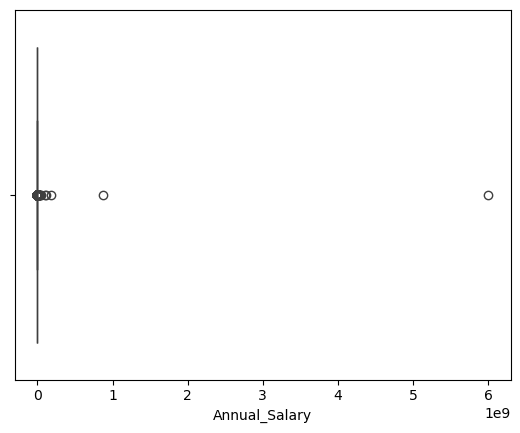

In [31]:
#Checking outliers in salary.

sns.boxplot(data=df, x="Annual_Salary")


In [32]:
#Checking again on missing values
df.isnull().sum()

Timestamp                    0
Age                          0
Industry                    74
Job_title                    2
Job_title_context        20819
Annual_Salary                0
Monetary_Compensation     7305
Currency                     0
Other_currencies         27879
Income_context           25042
Country_of_work              1
US_State                  5026
City_of_work                91
Overral_experience           0
Field_Expe_Years             0
Education                  222
Gender                     171
dtype: int64

In [33]:
#Checking if Annual Salary changed to numerical

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Job_title_context      7266 non-null   object 
 5   Annual_Salary          28085 non-null  float64
 6   Monetary_Compensation  20780 non-null  float64
 7   Currency               28085 non-null  object 
 8   Other_currencies       206 non-null    object 
 9   Income_context         3043 non-null   object 
 10  Country_of_work        28084 non-null  object 
 11  US_State               23059 non-null  object 
 12  City_of_work           27994 non-null  object 
 13  Overral_experience     28085 non-null  object 
 14  Field_Expe_Years       28085 non-null  object 
 15  Educati

In [34]:
#Changing NaN to 0 on Salary and Compensation features

df['Annual_Salary']= df['Annual_Salary'].replace(to_replace = np.nan, value = 0)
df['Monetary_Compensation']= df['Monetary_Compensation'].replace(to_replace = np.nan, value = 0)

In [35]:
#Checking the statistical values after the changes done.

df.describe()

,Annual_Salary,Monetary_Compensation
count,2.808500e+04,2.808500e+04
mean,3.612420e+05,1.343166e+04
std,3.620792e+07,7.172276e+05
min,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00
50%,7.500000e+04,0.000000e+00
75%,1.100000e+05,5.000000e+03
max,6.000070e+09,1.200000e+08


In [36]:
#Suppressing the scientific notation in salary and monetary compensation.

pd.options.display.float_format='{:.2f}'.format

#Stack Overflow. (n.d.). python - How to suppress scientific notation when printing float values? 
#[online] Available at: https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values.

In [37]:
#Checking statistics after suppressing the scientific notation in the numerical features.

df.describe()


,Annual_Salary,Monetary_Compensation
count,28085.00,28085.00
mean,361242.01,13431.66
std,36207917.84,717227.63
min,0.00,0.00
25%,54000.00,0.00
50%,75000.00,0.00
75%,110000.00,5000.00
max,6000070000.00,120000000.00


In [38]:
# Income_context has only 3043 non-null values, which mean almost 90% of the data is missing for this feature so it became redundant. 
#Job_title_context is also redundant with only a bit more than 25% of data.
# Other_currencies has only 206 values and it can be dropped
#Us state and city I will not use because I will use currency as geographic

new_df = df.drop(columns=['Income_context','Job_title_context','Other_currencies','US_State','City_of_work'])

In [39]:
#Double checking features to make sure all of them have a good number of non-null values.

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Annual_Salary          28085 non-null  float64
 5   Monetary_Compensation  28085 non-null  float64
 6   Currency               28085 non-null  object 
 7   Country_of_work        28084 non-null  object 
 8   Overral_experience     28085 non-null  object 
 9   Field_Expe_Years       28085 non-null  object 
 10  Education              27863 non-null  object 
 11  Gender                 27914 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.8+ MB


In [40]:
df = new_df

Text(0.5, 1.0, 'Age distribution')

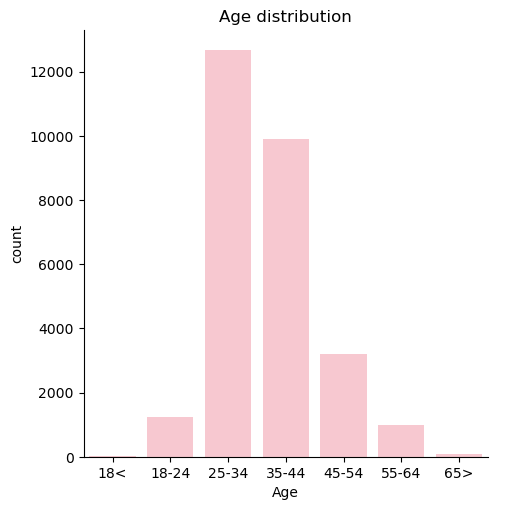

In [41]:
#Plotting some graphics to visualize the data shape.

sns.catplot(data=df, x="Age",kind="count",color="pink", order=['18<','18-24','25-34','35-44','45-54','55-64','65>']);
plt.title("Age distribution")

Text(0.5, 1.0, 'Education distribution')

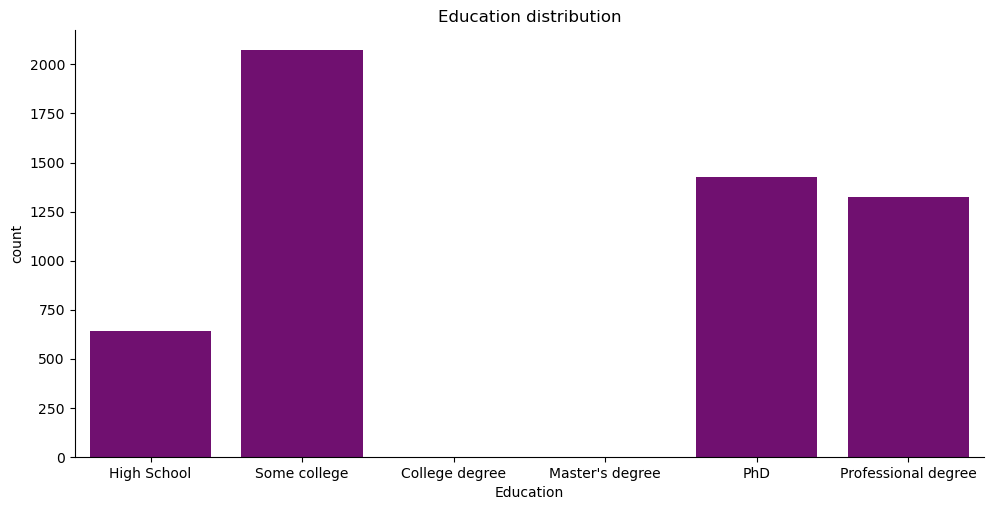

In [42]:
#Catplot to visualize Education feature, most have college degree and masters degree

sns.catplot(data=df, x="Education", kind="count", color="purple", order=['High School','Some college','College degree',
"Master's degree", 'PhD','Professional degree'], aspect=2.);
plt.title("Education distribution")

Text(0.5, 1.0, 'Currency distribution')

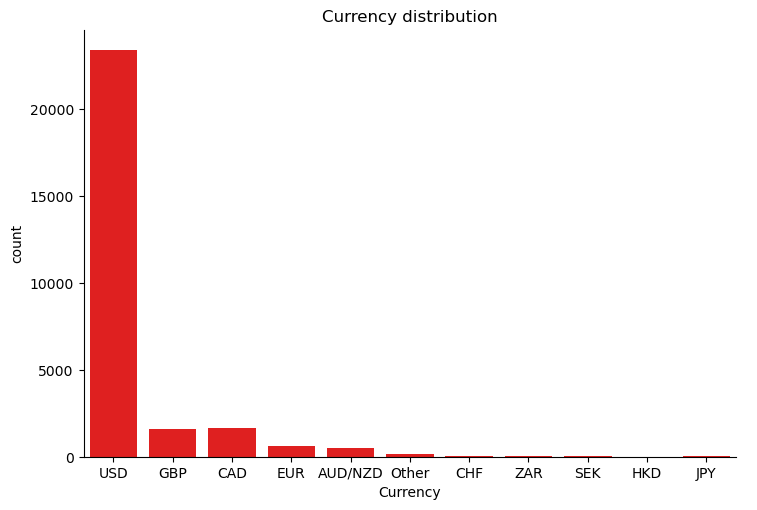

In [43]:
sns.catplot(data=df, x="Currency", kind="count", color="red", aspect=1.5);
plt.title("Currency distribution")

Text(0.5, 1.0, 'Field experience distribution')

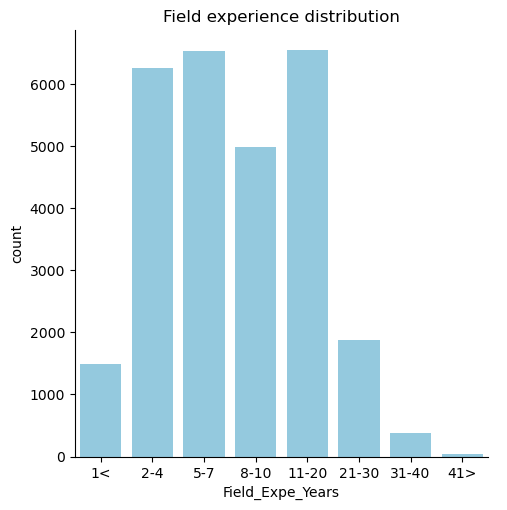

In [44]:
sns.catplot(data=df, x="Field_Expe_Years", kind="count", color="skyblue", order=['1<','2-4','5-7','8-10','11-20','21-30','31-40','41>']);
plt.title("Field experience distribution")

Text(0.5, 1.0, 'Gender distribution')

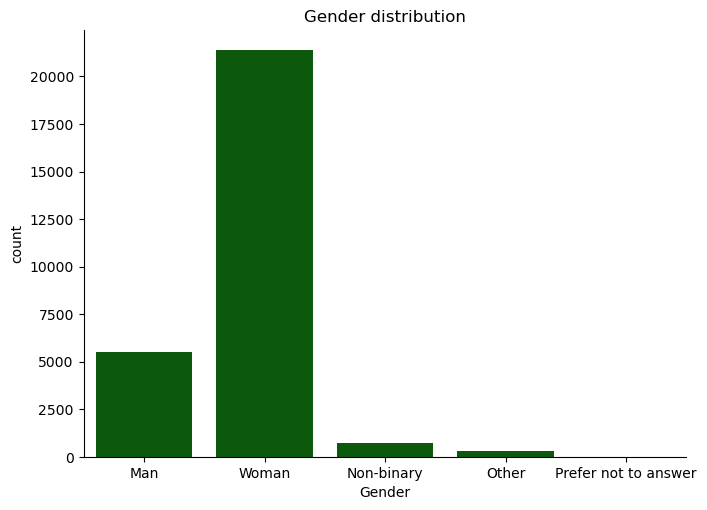

In [45]:
sns.catplot(data=df, x="Gender", kind="count", color="darkgreen",aspect=1.4, order=['Man','Woman','Non-binary','Other','Prefer not to answer']);
plt.title("Gender distribution")

In [46]:
#Clean and organize countries of work:

# Sort in alphabetical order to easier replacement of the values
df_country = df.sort_values('Country_of_work')

In [47]:
df_country['Country_of_work'].unique()

array([' New Zealand', ' U.S.', ' US', ' United States',
       '$2,175.84/year is deducted for benefits',
       'ARGENTINA BUT MY ORG IS IN THAILAND', 'Afghanistan', 'Africa',
       'America', 'Aotearoa New Zealand', 'Argentina', 'Australi',
       'Australia', 'Australia ', 'Australian ', 'Austria',
       'Austria, but I work remotely for a Dutch/British company',
       'Bangladesh', 'Bangladesh ', 'Belgium', 'Belgium ', 'Bermuda',
       'Bosnia and Herzegovina', 'Brasil', 'Brazil', 'Brazil ',
       'Britain ', 'Bulgaria', 'Burma', 'CANADA', 'CANADA ',
       'California ', 'Cambodia', 'Can', 'Canad', 'Canada', 'Canada ',
       'Canada and USA', 'Canada, Ottawa, ontario', 'Canadw', 'Canadá',
       'Canda', 'Catalonia', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Company in Germany. I work from Pakistan.', 'Congo',
       'Contracts', 'Costa Rica', "Cote d'Ivoire", 'Croatia ', 'Csnada',
       'Cuba', 'Currently finance', 'Cyprus', 'Czech Republic',
       'Czech R

In [48]:
#Creating a dictionary to replace bellow.

Replac_Country={' New Zealand':'New Zealand', ' U.S.':'USA', ' US':'USA', ' United States':'USA',
'$2,175.84/year is deducted for benefits':'','ARGENTINA BUT MY ORG IS IN THAILAND':'Argentina', 'Africa':'South Africa',
'America':'USA', 'Aotearoa New Zealand':'New Zealand','Australi':'Australia', 'Australia ':'Australia', 'Australian ':'Australia', 'Austria':'Austria','Austria, but I work remotely for a Dutch/British company':'Austria',
'Bangladesh ':'Bangladesh','Belgium ':'Belgium','Brasil':'Brazil', 'Brazil ':'Brazil','Britain ':'UK', 'Burma':'Myanmar', 'CANADA':'Canada', 'CANADA ':'Canada',
'California ':'USA', 'Can':'Canada', 'Canad':'Canada','Canada ':'Canada', 'Canada and USA':'Canada', 'Canada, Ottawa, ontario':'Canada', 'Canadw':'Canada', 
'Canadá':'Canada','Canda':'Canada', 'Catalonia':'Spain', 'Cayman Islands':'UK','Company in Germany. I work from Pakistan.':'Pakistan',
'Contracts':'','Croatia ':'Croatia', 'Csnada':'Canada','Currently finance':'','Czech Republic ':'Czech Republic','Czech republic':'Czech Republic',
'Czechia':'Czech Republic', 'Danmark':'Denmark', 'Denmark ':'Denmark', 'ENGLAND':'UK', 'England':'UK', 'England ':'UK','England, Gb':'UK', 
'England, UK':'UK', 'England, UK.':'UK','England, United Kingdom':'UK', 'England, United Kingdom ':'UK','England/UK':'UK', 'Englang':'UK',
'FRANCE':'France','For the United States government, but posted overseas':'','France ':'France', 'From New Zealand but on projects across APAC':'New Zealand',
'From Romania, but for an US based company':'Romania', 'Germany ':'Germany','Global':'', 'Great Britain':'UK', 'Great Britain ':'UK','Hartford':'USA',
'Hong Kong ':'Hong Kong','I am located in Canada but I work for a company in the US':'Canada',"I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission. ":'',
'I was brought in on this salary to help with the EHR and very quickly was promoted to current position but compensation was not altered. ':'',
'I work for a UAE-based organization, though I am personally in the US.':'USA',"I work for an US based company but I'm from Argentina.":'Argentina',
'I.S.':'Iceland','INDIA':'India', 'IS':'Iceland', 'ISA':'USA','International ':'','Ireland ':'Ireland', 'Italy (South)':'Italy',
'Japan ':'Japan','Japan, US Gov position':'Japan', 'Jersey, Channel islands':'Channel islands', 'LOUTRELAND':'Ireland','London':'UK', 'Luxemburg':'Luxembourg',
'Mainland China':'China', 'Malaysia ':'Malaysia', 'Mexico ':'Mexico', 'México':'Mexico', 'NIGERIA':'Nigeria', 'NL':'Netherlands', 'NZ':'New Zealand', 
'Nederland':'Netherlands','Netherlands ':'Netherlands', 'New Zealand ': 'New Zealand','New Zealand Aotearoa': 'New Zealand', 'New zealand': 'New Zealand', 
'Nigeria ':'Nigeria','Northern Ireland':'UK', 'Northern Ireland ':'UK','Northern Ireland, United Kingdom':'UK', 'Norway ':'Norway', 'Poland ':'Poland',
'Policy':'Poland','Portugal ':'Portugal', 'Puerto Rico ':'Puerto Rico','Remote':'', 'Remote (philippines)':'Philippines','Russia ':'Russia',
'SWITZERLAND':'Switzerland', 'San Francisco':'USA','Scotland':'UK','Scotland ':'UK', 'Scotland, UK':'UK','Singapore ': 'Singapore','South Africa ':'South Africa',
'South Korea ':'South Korea', 'South africa':'South Africa','Spain ':'Spain', 'Sri lanka':'Sri Lanka', 'Sweden ':'Sweden','Switzerland ':'Switzerland', 
'The Netherlands':'Netherlands', 'The Netherlands ':'Netherlands', 'The US':'USA','The United States':'USA', 'The netherlands':'Netherlands',
'U. S ':'USA', 'U. S.':'USA', 'U. S. ':'USA', 'U.A.':'UAE', 'U.K':'UK', 'U.K.':'UK','U.K. ':'UK', 'U.K. (northern England)':'UK', 'U.S':'USA',
'U.S.':'USA', 'U.S. ':'USA','U.S.A':'USA', 'U.S.A ':'USA', 'U.S.A.':'USA', 'U.S.A. ':'USA', 'U.S>':'USA', 'U.SA':'USA', 'U.s.':'USA', 'U.s.a.':'USA',
'UA':'UAE','UK ':'UK', 'UK (England)':'UK','UK (Northern Ireland)':'UK', 'UK for U.S. company':'UK',
'UK, but for globally fully remote company':'UK', 'UK, remote':'UK','UNITED STATES':'USA', 'UNited States':'USA', 'US':'USA', 'US ':'USA',
'US govt employee overseas, country withheld':'USA', 'US of A':'USA','USA ':'USA', 
'USA (company is based in a US territory, I work remote)':'USA', 'USA tomorrow ':'USA', "USA, but for foreign gov't":'USA',
'USA-- Virgin Islands':'USA', 'USAB':'USA', 'USD':'USA', 'USS':'USA', 'USaa':'USA', 'UXZ':'', 'Uk':'UK', 'Uk ':'UK', 'Ukraine ':'Ukraine',
    'Uniited States':'USA','Unite States':'USA', 'United  States':'USA', 'United Arab Emirates ':'UAE','United Kindom':'UK', 'United Kingdom':'UK',
'United Kingdom ':'UK','United Kingdom (England)':'UK', 'United Kingdom.':'UK', 'United Kingdomk':'UK', 'United STates':'USA', 'United Sates':'USA',
'United Sates of America':'USA','United Stares':'USA', 'United Stares ':'USA', 'United State':'USA',
       'United State of America':'USA', 'United Statea':'USA', 'United Stated':'USA',
       'United Stateds':'USA', 'United Statees':'USA', 'United States':'USA',
       'United States ':'USA','United States (I work from home and my clients are all over the US/Canada/PR':'USA',
       'United States Of America':'USA', 'United States is America':'USA','United States of America':'USA', 'United States of America ':'USA',
       'United States of American':'USA', 'United States of American ':'USA','United States of Americas':'USA', 'United States of america':'USA',
       'United States of america ':'USA', 'United States- Puerto Rico':'USA',
       'United Statesp':'USA', 'United Statss':'USA', 'United Stattes':'USA',
       'United Statues':'USA', 'United Status':'USA', 'United Statws':'USA', 'United Sttes':'USA',
       'United kingdom':'UK', 'United kingdom ':'UK', 'United states':'USA',
       'United states ':'USA', 'United states of America':'USA','United states of America ':'USA', 'United states of america':'USA',
       'United statew':'USA', 'United y':'USA', 'UnitedStates':'USA', 'Uniteed States':'USA',
       'Unitef Stated':'USA', 'Uniter Statez':'USA', 'Unites States':'USA',
       'Unites States ':'USA', 'Unites kingdom ':'UK', 'Unites states ':'USA',
       'Unitied States':'USA', 'Uniyed states':'USA', 'Uniyes States':'USA', 'Unted States':'USA',
       'Untied States':'USA', 'Us':'USA', 'Us ':'USA', 'UsA':'USA', 'Usa':'USA', 'Usa ':'USA',
       'Usat':'USA', 'Virginia':'USA', 'Wales':'UK', 'Wales (UK)':'UK',
       'Wales (United Kingdom)':'UK', 'Wales, UK':'UK','The Bahamas ':'Bahamas',
       "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located":'',
       'Worldwide (based in US but short term trips aroudn the world)':'USA',
       'Y':'', 'america':'USA', 'australia':'Australia',
       'bonus based on meeting yearly goals set w/ my supervisor':'',
       'canada':'Canada', 'croatia':'Croatia', 'czech republic':'Czech Republic', 'dbfemf':'', 'denmark':'Denmark',
       'england':'UK', 'europe':'', 'ff':'', 'finland':'', 'france':'France', 'germany':'Germany',
       'hong konh':'Hong Kong', 'ibdia':'India', 'ireland':'Ireland', 'japan':'Japan',
       'n/a (remote from wherever I want)':'', 'netherlands':'Netherlands', 'new zealand':'New Zealand',
       'pakistan':'Pakistan', 'philippines':'Philippines', 'singapore':'Singapore', 'spain':'Spain', 'ss':'',
       'switzerland':'Switzerland', 'the Netherlands':'Netherlands', 'the netherlands':'Netherlands', 'u.s.':'USA', 'uS':'USA',
       'uSA':'USA', 'uk':'UK', 'united States':'USA', 'united kingdom':'UK', 'united stated':'USA',
       'united states':'USA', 'united states ':'USA', 'united states of america':'USA',
       'us':'USA', 'usa':'USA', 'usa ':'USA', '🇺🇸 ':'USA','Panamá':'Panama','Bosnia and Herzegovina':'Bosnia'}

In [49]:
#Replacing the values added in the dictionary.

df_country['Country_of_work']=df['Country_of_work'].replace(Replac_Country)


In [50]:
#Checking how it turned out.

df_country['Country_of_work'].unique()

array(['New Zealand', 'USA', '', 'Argentina', 'Afghanistan',
       'South Africa', 'Australia', 'Austria', 'Bangladesh', 'Belgium',
       'Bermuda', 'Bosnia', 'Brazil', 'UK', 'Bulgaria', 'Myanmar',
       'Canada', 'Cambodia', 'Spain', 'Chile', 'China', 'Colombia',
       'Pakistan', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador',
       'Eritrea', 'Estonia', 'France', 'Finland', 'Romania', 'Germany',
       'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Isle of Man', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Channel islands', 'Jordan', 'Kenya', 'Kuwait',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mexico', 'Morocco', 'Nigeria', 'Netherlands', 'Norway',
       'Panama', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Qatar', 'Russia', 'Rwanda', 'Switzerland', 'Saudi Arabia',
       'Serbia', 'Sierra Leone', 

Text(0.5, 1.0, 'Top 10 Countries of work')

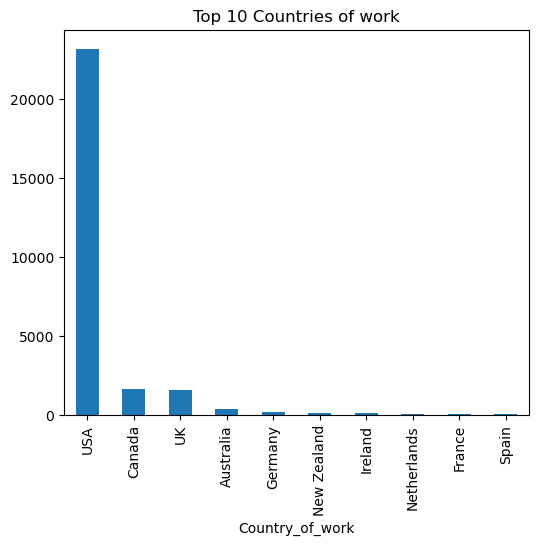

In [51]:
#Ckecking the top 10 countries.

df_country["Country_of_work"].value_counts().nlargest(10).plot(kind="bar",figsize=(6,5))
plt.title("Top 10 Countries of work")


Text(0.5, 1.0, 'Top 10 Currencies')

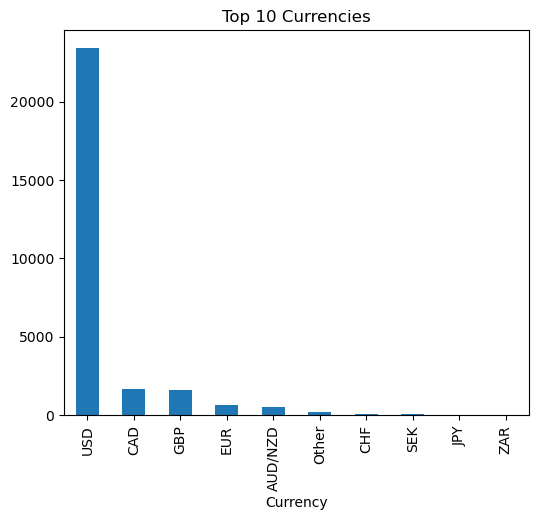

In [52]:
#Checking top 10 currencies.

df["Currency"].value_counts().nlargest(10).plot(kind="bar",figsize=(6,5))
plt.title("Top 10 Currencies")

##---> The analysis will be done with USD since it has more data on it.

In [53]:
##Removing all currencies and keeping only USD since most of the values are in USD.

df_currency = df[~df["Currency"].isin(("Other", "CHF",'ZAR','SEK','HKD','JPY','GBP', 'CAD', 'EUR', 'AUD/NZD'))]
df_currency['Currency'].unique()

#Reference: Stack Overflow. (n.d.). Pandas remove every entry with a specific value.
#[online] Available at: https://stackoverflow.com/questions/73907106/pandas-remove-every-entry-with-a-specific-value.


array(['USD'], dtype=object)

In [54]:
#Using reset index to reorganize the index after dropping the currencies.

df_currency.reset_index(drop=True, inplace=True)

#Reference:
#JPC (2016). how to reset index pandas dataframe after dropna() pandas dataframe. 
#[online] Stack Overflow. Available at: https://stackoverflow.com/questions/40755680/how-to-reset-index-pandas-dataframe-after-dropna-pandas-dataframe.

In [55]:
#Checking 5 first observations for an overview of the changes.

df_currency.head()

,Timestamp,Age,Industry,Job_title,Annual_Salary,Monetary_Compensation,Currency,Country_of_work,Overral_experience,Field_Expe_Years,Education,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.00,0.00,USD,United States,5-7 years,5-7,Master's,Woman
1,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.00,0.00,USD,US,2 - 4 years,2-4,College,Woman
2,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.00,3000.00,USD,USA,8 - 10 years,5-7,College,Woman
3,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.00,7000.00,USD,US,8 - 10 years,5-7,College,Woman
4,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000.00,0.00,USD,USA,8 - 10 years,2-4,Master's,Man


<Axes: xlabel='Annual_Salary'>

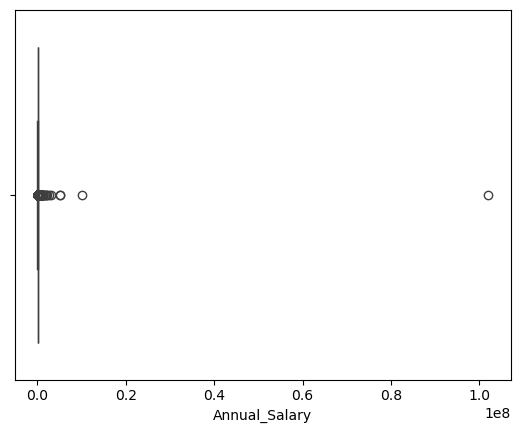

In [56]:
#Checking again for outliers on salary since currencies where dropped.

sns.boxplot(data=df_currency, x="Annual_Salary")


In [57]:
#Checking to see statistics after dropping currencies.

df_currency.describe()

##---> Mean and medium are still different which means the possible presence of outliers.

,Annual_Salary,Monetary_Compensation
count,23395.00,23395.00
mean,97087.02,9538.23
std,674397.59,40844.23
min,0.00,0.00
25%,56000.00,0.00
50%,78000.00,0.00
75%,112000.00,6000.00
max,102000000.00,1500000.00


In [58]:
#Calculating the quartiles to remove outliers.

Q1 = df_currency["Annual_Salary"].quantile(0.25)
Q3 = df_currency["Annual_Salary"].quantile(0.75)

IQR = Q3 - Q1

low = Q1-1.5*IQR
up = Q3 + 1.5*IQR

In [59]:
# Indicating the outliers rows

up_array = np.where(df_currency["Annual_Salary"]>=up)[0]
low_array = np.where(df_currency["Annual_Salary"]<=low)[0]

In [60]:
#Removing outliers.

df_currency.drop(index=up_array, inplace=True)
df_currency.drop(index=low_array, inplace=True)

C:\Users\janai\AppData\Local\Temp\ipykernel_20656\1067462687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency.drop(index=up_array, inplace=True)
C:\Users\janai\AppData\Local\Temp\ipykernel_20656\1067462687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency.drop(index=low_array, inplace=True)


Text(0.5, 1.0, 'Salary distribution after dropping outliers')

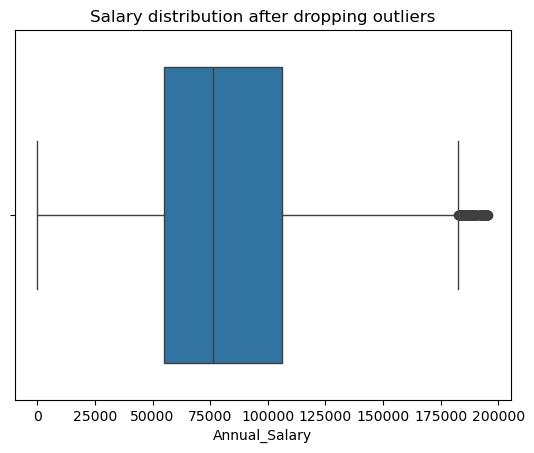

In [61]:
#Plotting boxplot after dropping the outliers.

sns.boxplot(data=df_currency, x="Annual_Salary")
plt.title("Salary distribution after dropping outliers")

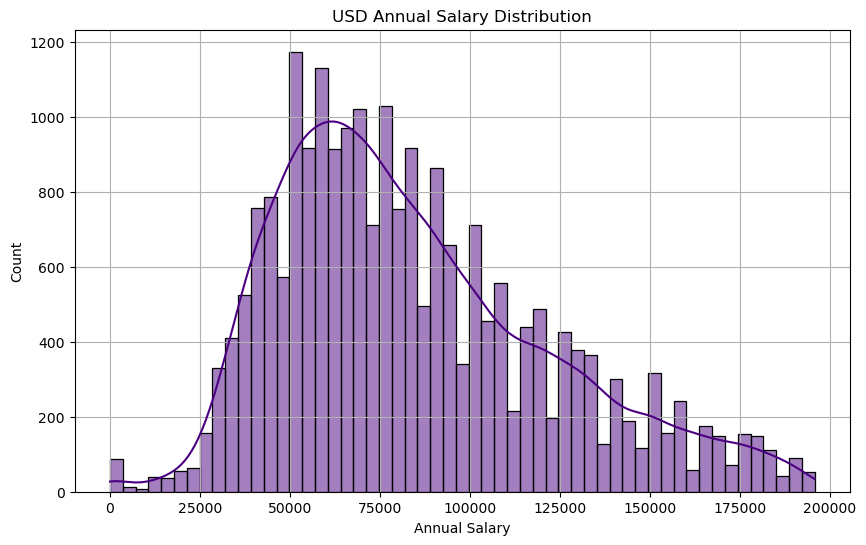

In [62]:
#Visualization of salary distribution in USD. 

plt.figure(figsize=(10, 6))
sns.histplot(data=df_currency, x="Annual_Salary", kde=True, color='indigo')
plt.xlabel('Annual Salary')
plt.title('USD Annual Salary Distribution')
plt.grid(True)

##---> The data is not normally distributed, it is righted skewed.

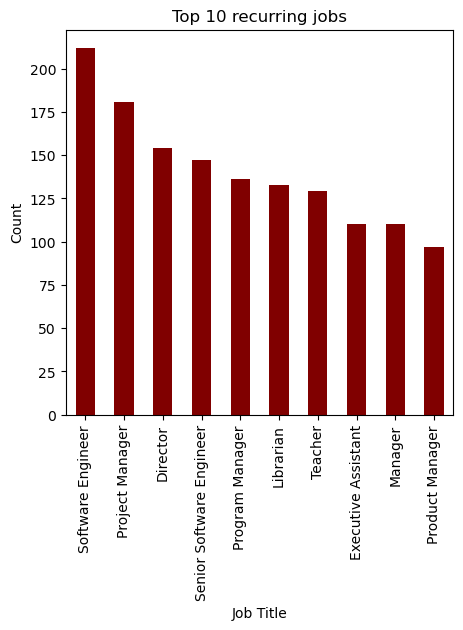

In [63]:
df_currency.Job_title.value_counts().nlargest(10).plot(kind="bar", color='maroon', figsize=(5,5))
plt.title("Top 10 recurring jobs")
plt.ylabel("Count")
plt.xlabel("Job Title");

Text(0.5, 1.0, 'Gender and salary distribution')

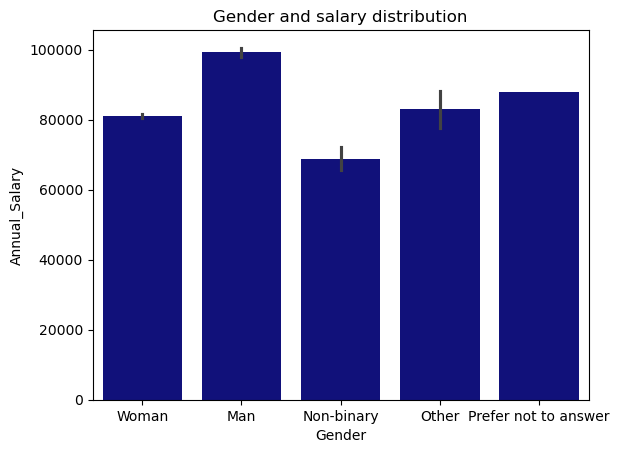

In [64]:
ax = sns.barplot(x='Gender', y='Annual_Salary', color= 'darkblue',data=df_currency) 
plt.title("Gender and salary distribution")

Text(0.5, 1.0, 'Field experience and salary distribution')

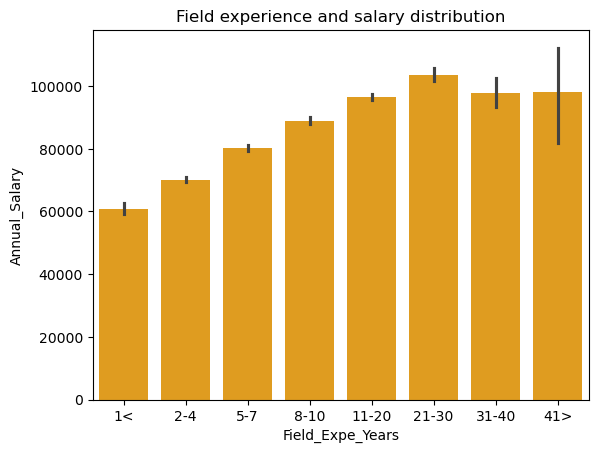

In [65]:
ax = sns.barplot(x='Field_Expe_Years', y='Annual_Salary', data=df_currency,color="orange", 
order=['1<','2-4','5-7','8-10','11-20','21-30','31-40','41>']) 
plt.title("Field experience and salary distribution")

Text(0.5, 1.0, 'Field Experience distribution by gender')

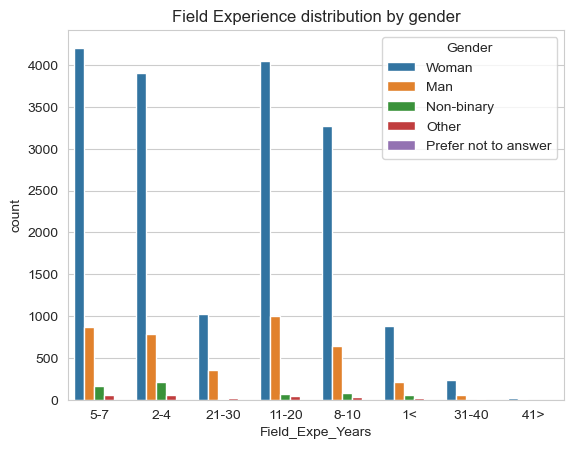

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Field_Expe_Years',hue='Gender',data=df_currency)
plt.title("Field Experience distribution by gender")

<Axes: xlabel='Job_title'>

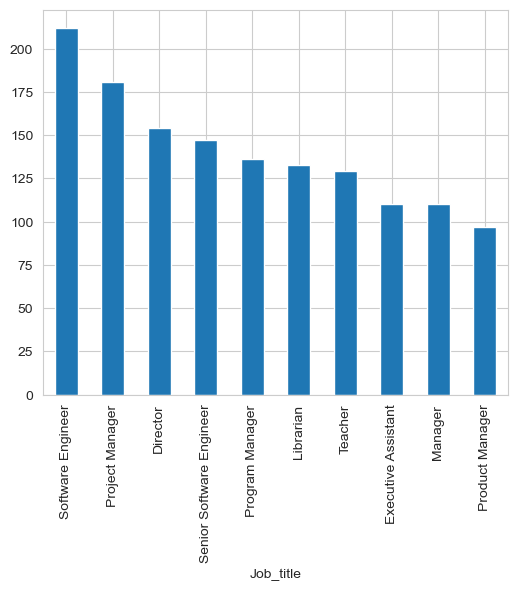

In [67]:
df_currency["Job_title"].value_counts().nlargest(10).plot(kind="bar",figsize=(6,5))
#plt.title( 10 most recurring job titles")

Text(0.5, 1.0, 'Top 10 Industries')

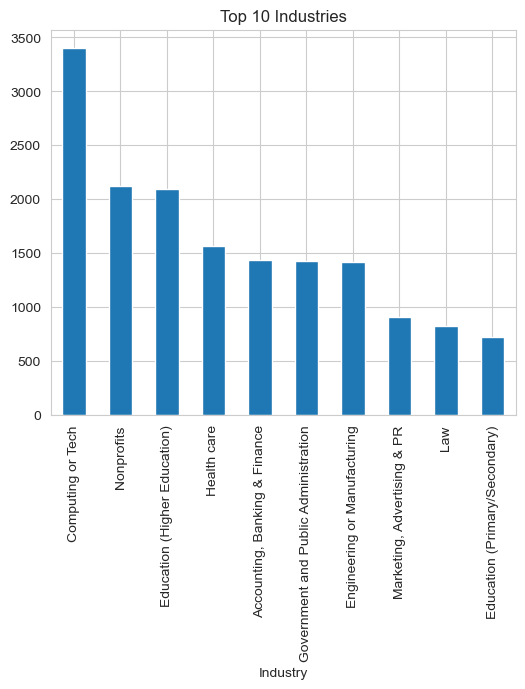

In [68]:
df_currency["Industry"].value_counts().nlargest(10).plot(kind="bar",figsize=(6,5))
plt.title("Top 10 Industries")

In [69]:
from sklearn import preprocessing 

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
#Transforming categorical features to numerical in order to do feature selection and preparing for machine learning.

df_currency['Age']= label_encoder.fit_transform(df_currency['Age'])

#Reference: 
#chugh, aakarsha (2018). ML | Label Encoding of datasets in Python. 
#[online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/.

C:\Users\janai\AppData\Local\Temp\ipykernel_20656\1979622292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Age']= label_encoder.fit_transform(df_currency['Age'])


In [72]:
#Checking how the feature "Age" turned.

df_currency['Age'].unique() 

array([2, 4, 3, 0, 6, 5, 1])

In [73]:
df_currency['Field_Expe_Years']= label_encoder.fit_transform(df_currency['Field_Expe_Years'])

C:\Users\janai\AppData\Local\Temp\ipykernel_20656\2188385520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Field_Expe_Years']= label_encoder.fit_transform(df_currency['Field_Expe_Years'])


In [74]:
df_currency['Overral_experience']= label_encoder.fit_transform(df_currency['Overral_experience'])

C:\Users\janai\AppData\Local\Temp\ipykernel_20656\1429837106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Overral_experience']= label_encoder.fit_transform(df_currency['Overral_experience'])


In [75]:
df_currency['Education']= label_encoder.fit_transform(df_currency['Education'])

C:\Users\janai\AppData\Local\Temp\ipykernel_20656\1407227945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Education']= label_encoder.fit_transform(df_currency['Education'])


In [76]:
df_currency['Gender']= label_encoder.fit_transform(df_currency['Gender'])

C:\Users\janai\AppData\Local\Temp\ipykernel_20656\67442173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Gender']= label_encoder.fit_transform(df_currency['Gender'])


In [77]:
#Dropping variables that will not be used to do the correlation heatmap.

df_heatmap = df_currency.drop(columns=['Timestamp','Industry','Job_title','Currency','Country_of_work'])

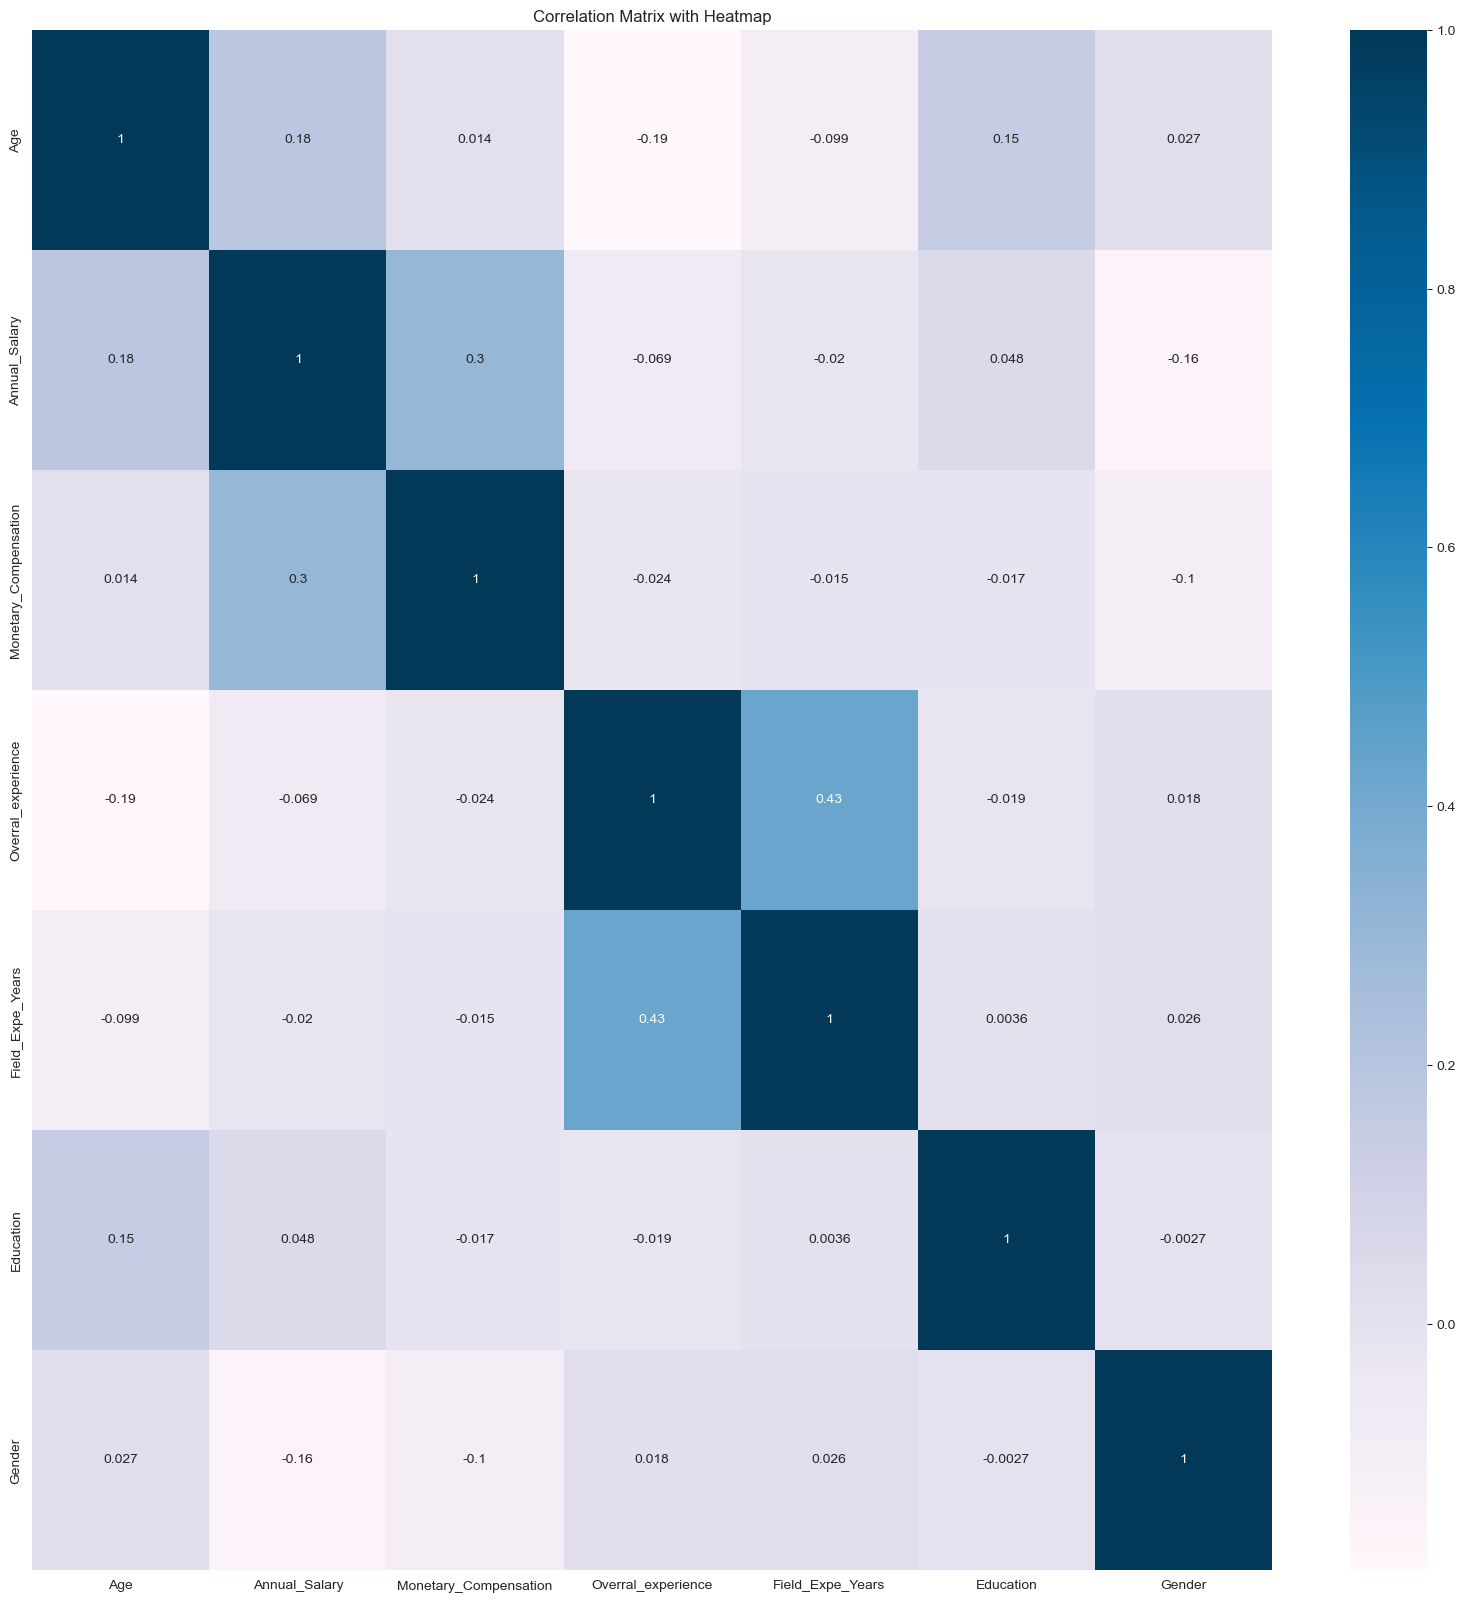

In [78]:
#Correlation Matrix with Heatmap

correlation = df_heatmap.corr()
topscore = correlation.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df_heatmap[topscore].corr(),annot=True,cmap="PuBu")
plt.title("Correlation Matrix with Heatmap")
sns.set(font_scale=1)